# Intelligent Property Analyser

### Table of Contents:
1. Data Collection & Description
2. Data Preprocessing
3. Training Model
4. Evaluating Model
5. Model Saving

### 1. Data Collection & Description

#### 1.1 Import Libraries

In [1]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt 
import seaborn as sns

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

#### 1.2 Data Description

In [2]:
df=pd.read_csv('Housing.csv')

In [3]:
df.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
53,7350000,5150,3,2,4,yes,no,no,no,yes,2,no,semi-furnished
184,5110000,3000,3,2,2,yes,yes,yes,no,no,0,no,furnished
477,2940000,4960,2,1,1,yes,no,no,no,no,0,no,unfurnished
216,4830000,6040,3,1,1,yes,no,no,no,no,2,yes,semi-furnished
421,3360000,4750,2,1,1,yes,no,no,no,no,0,no,unfurnished


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### 2. Data Preprocessing

#### 2.1 Data Quality Assessment

In [6]:
# Check for null values

print(df.isnull().sum())
print("\nMissing Values Present:", df.isnull().values.any())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Missing Values Present: False


In [7]:
# Check for duplicate values values

df[df.duplicated(keep=False)]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


In [8]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
cat_data = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
for i in cat_data:
    df[i] = lb.fit_transform(df[i])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [9]:
dms = pd.get_dummies(df[["furnishingstatus"]])
dms.head()

,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [10]:
dms.rename(columns = {'furnishingstatus_furnished':'furnished', 'furnishingstatus_semi-furnished':'semi-furnished',
                              'furnishingstatus_unfurnished':'unfurnished'}, inplace = True)
dms.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [11]:
df=pd.concat([df, dms], axis=1)
df.rename({'semi-furnished': 'semi_furnished'}, axis=1, inplace=True)
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furnished,semi_furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,1,0,0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,semi-furnished,0,1,0
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,semi-furnished,0,1,0
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,unfurnished,0,0,1
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,furnished,1,0,0
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,unfurnished,0,0,1


In [12]:
df=df.drop(['furnishingstatus'], axis=1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi_furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


array([[<AxesSubplot: title={'center': 'price'}>,
        <AxesSubplot: title={'center': 'area'}>,
        <AxesSubplot: title={'center': 'bedrooms'}>,
        <AxesSubplot: title={'center': 'bathrooms'}>],
       [<AxesSubplot: title={'center': 'stories'}>,
        <AxesSubplot: title={'center': 'mainroad'}>,
        <AxesSubplot: title={'center': 'guestroom'}>,
        <AxesSubplot: title={'center': 'basement'}>],
       [<AxesSubplot: title={'center': 'hotwaterheating'}>,
        <AxesSubplot: title={'center': 'airconditioning'}>,
        <AxesSubplot: title={'center': 'parking'}>,
        <AxesSubplot: title={'center': 'prefarea'}>],
       [<AxesSubplot: title={'center': 'furnished'}>,
        <AxesSubplot: title={'center': 'semi_furnished'}>,
        <AxesSubplot: title={'center': 'unfurnished'}>, <AxesSubplot: >]],
      dtype=object)

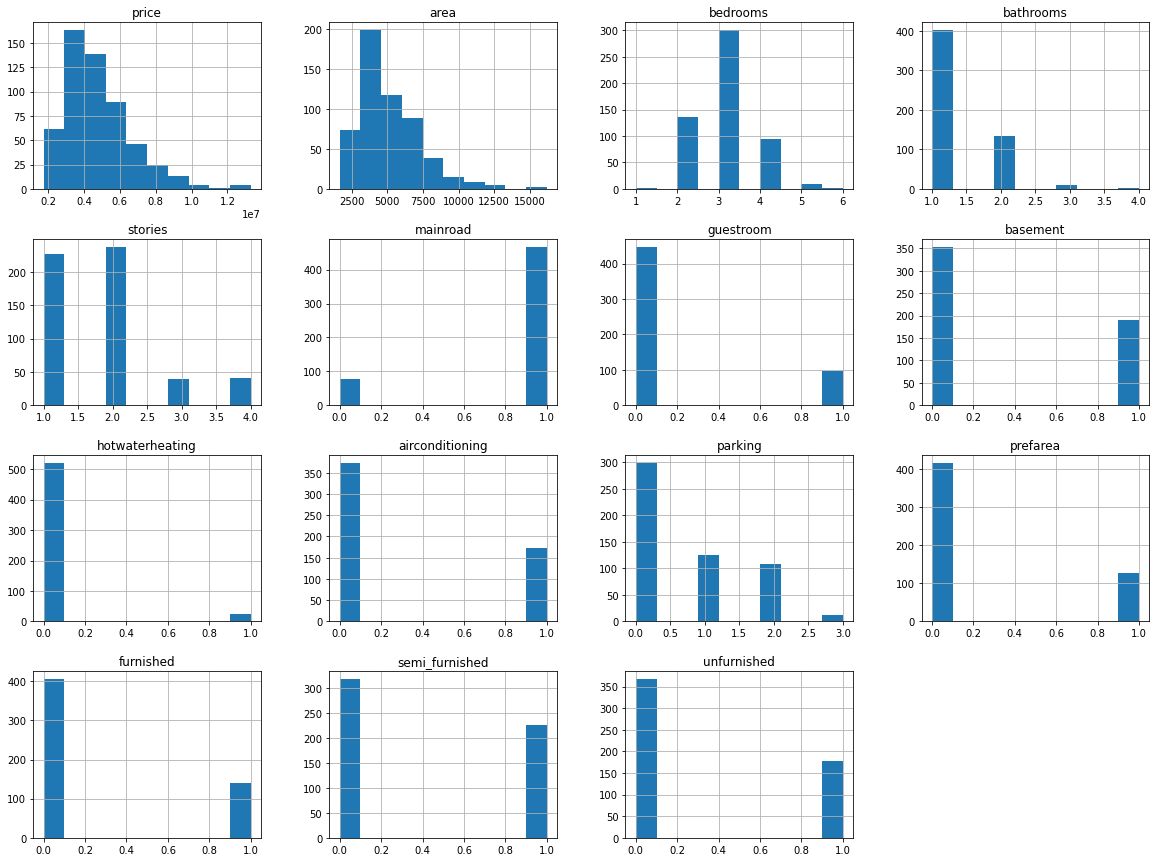

In [13]:
df.hist(figsize=(20,15))

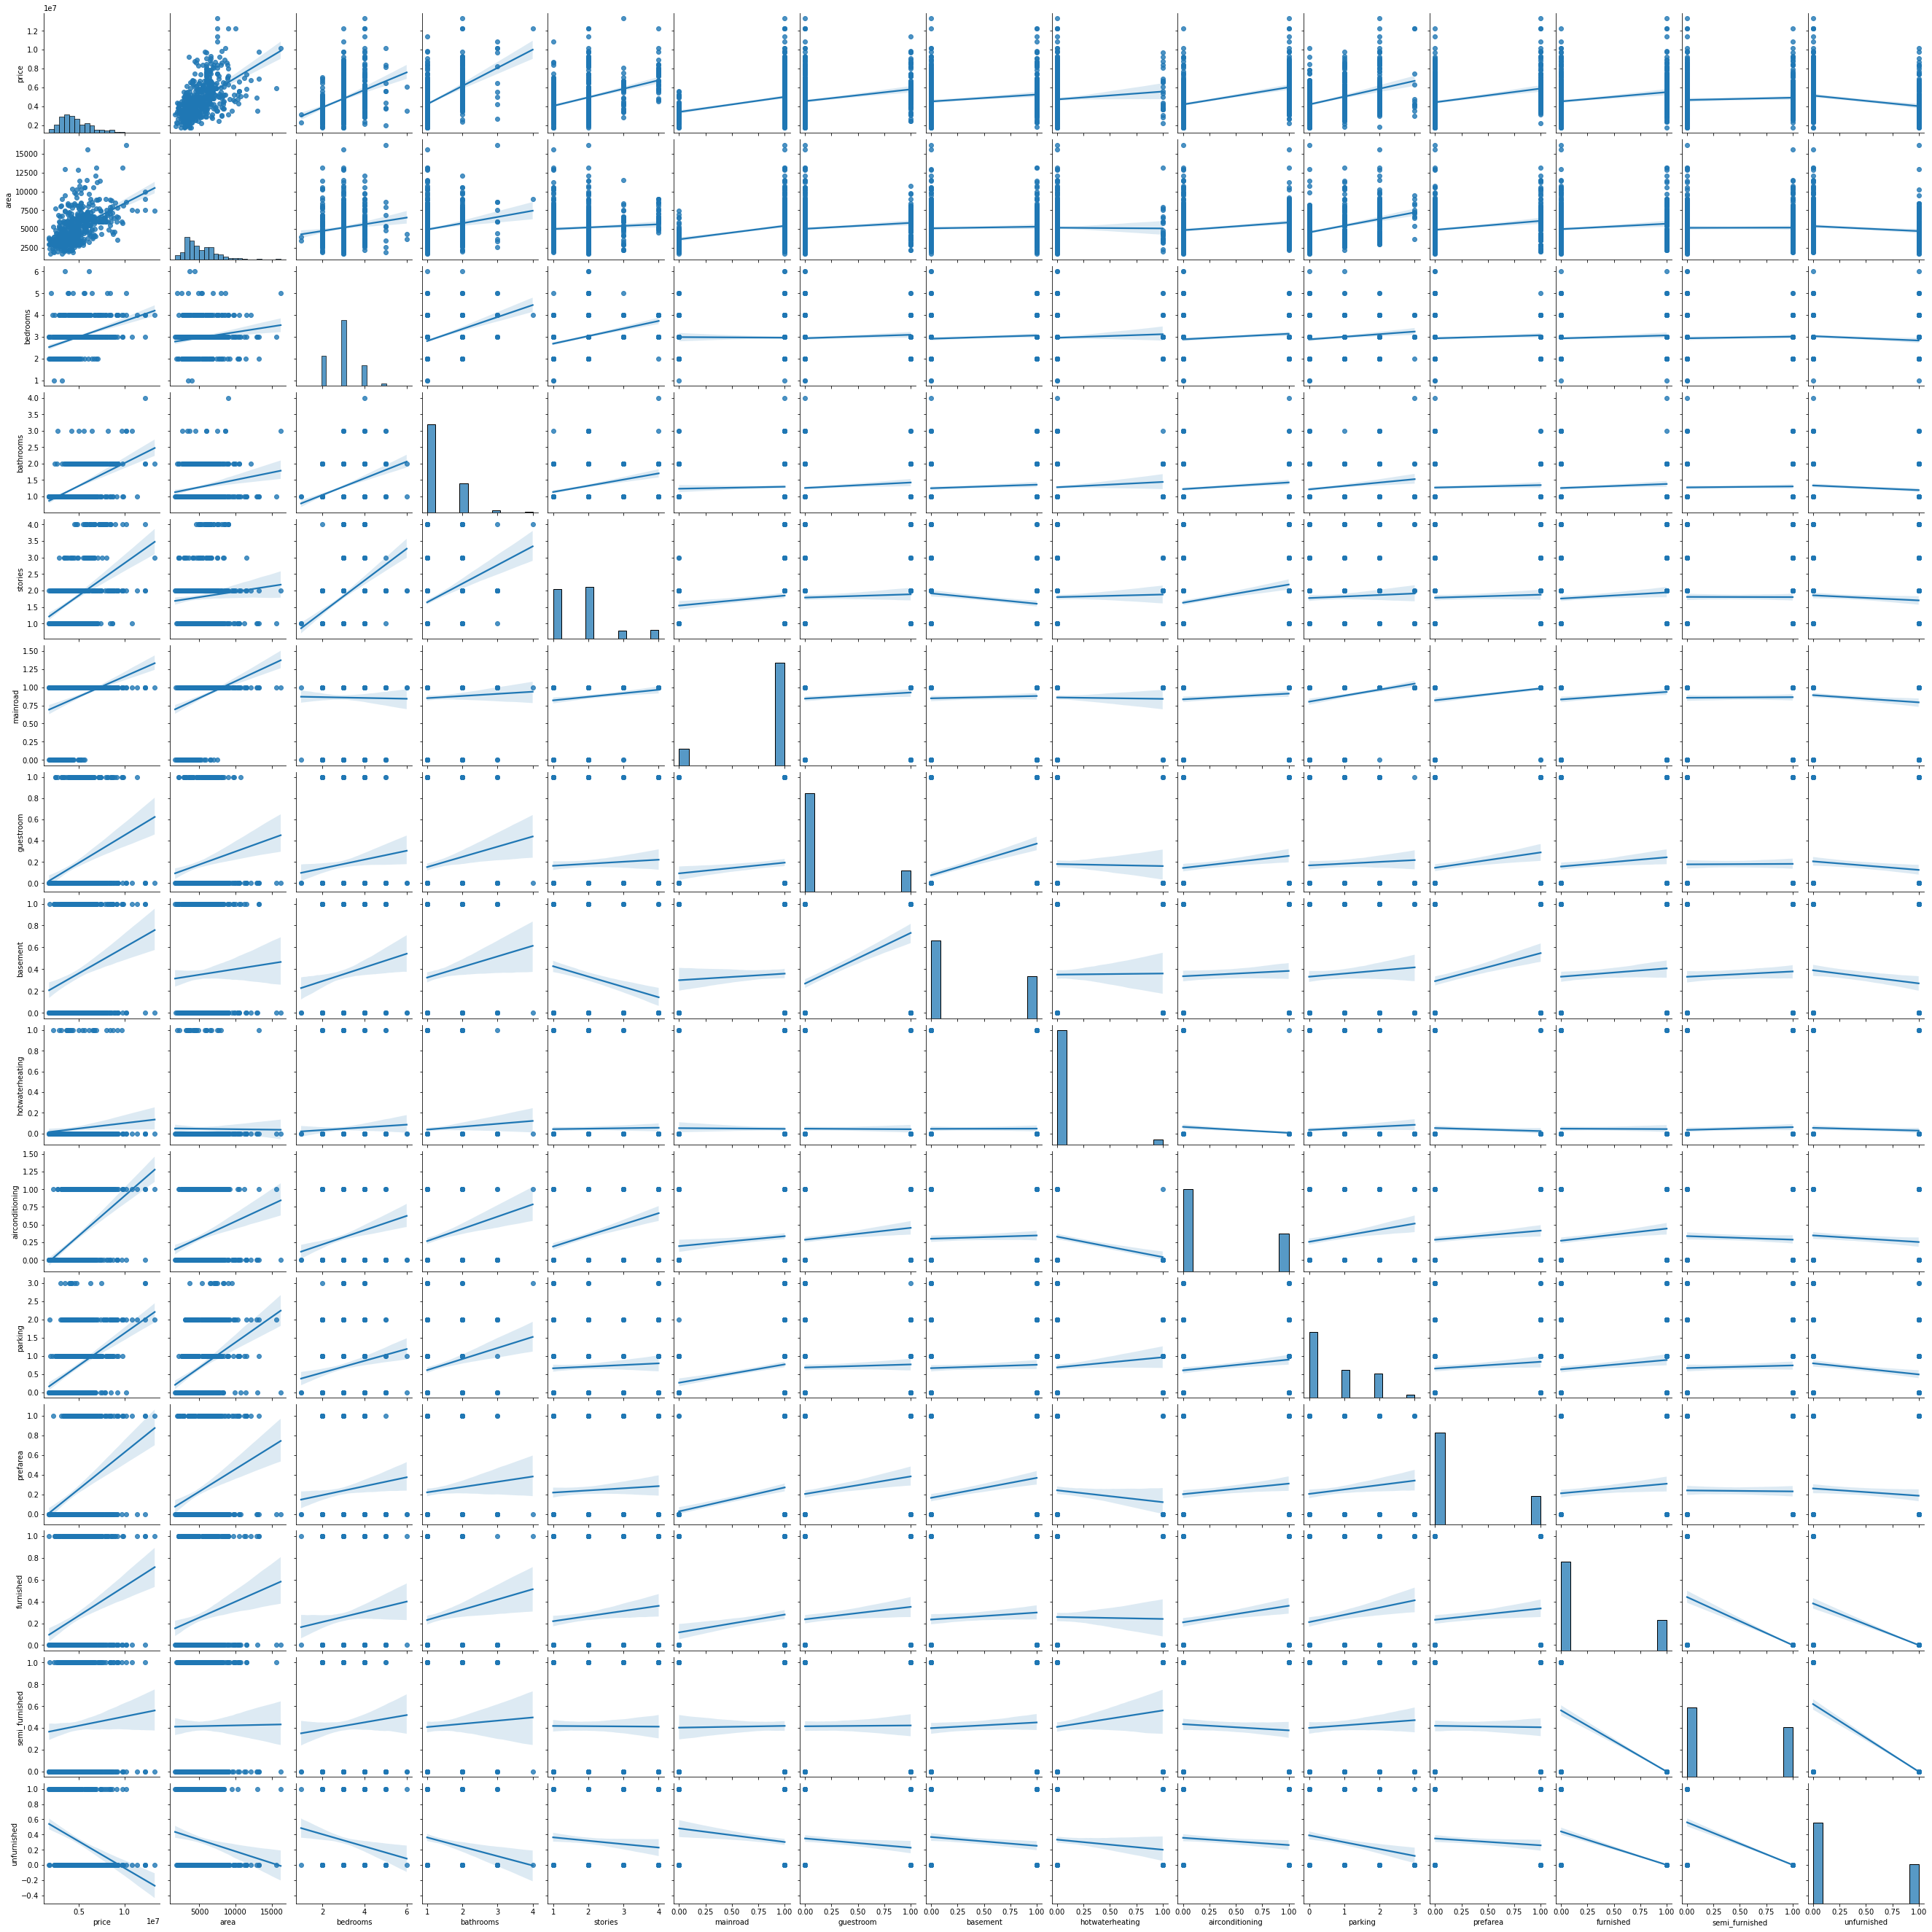

In [14]:
sns.pairplot(df, palette='bright', kind="reg")

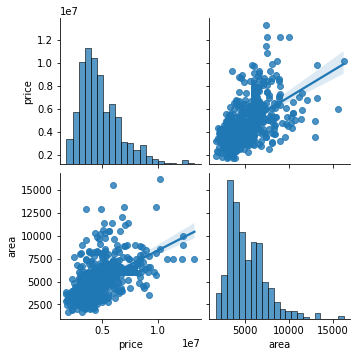

In [15]:
sns.pairplot(df[['price', 'area']], palette='bright', kind="reg")

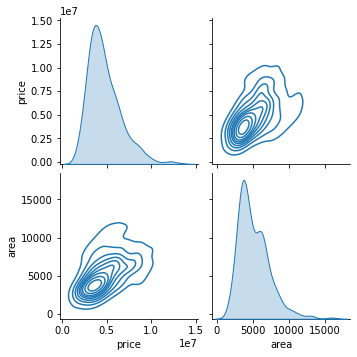

In [16]:
sns.pairplot(df[['price', 'area']], palette='bright', kind="kde")

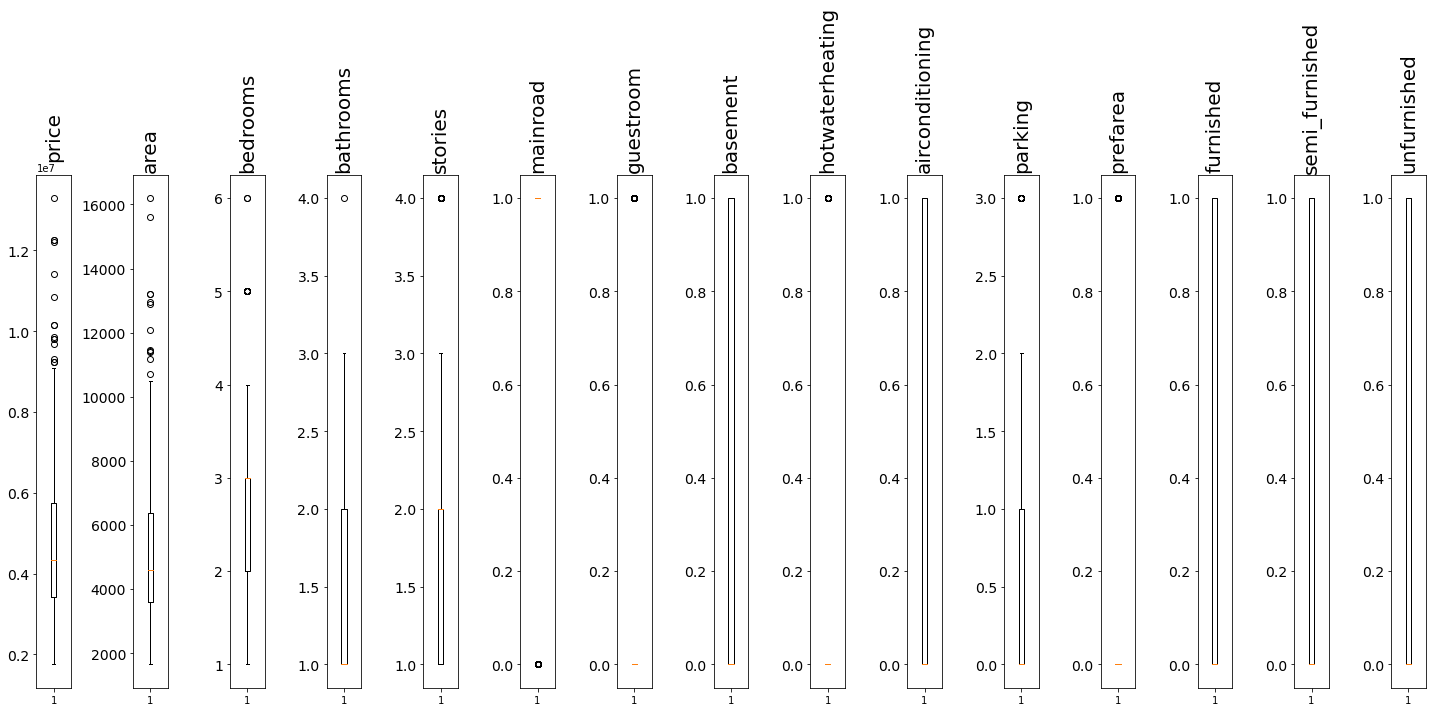

In [17]:
fig, axs = plt.subplots(1, len(df.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df.iloc[:,i])
    ax.set_title(df.columns[i], fontsize=20, rotation=90)
    ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

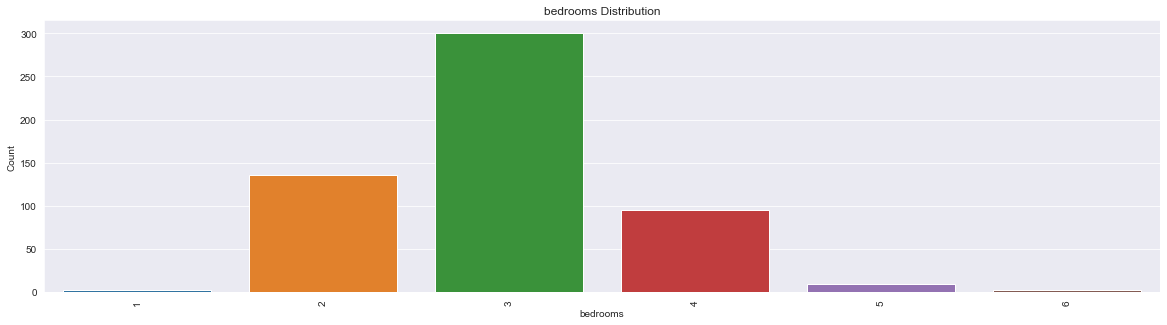

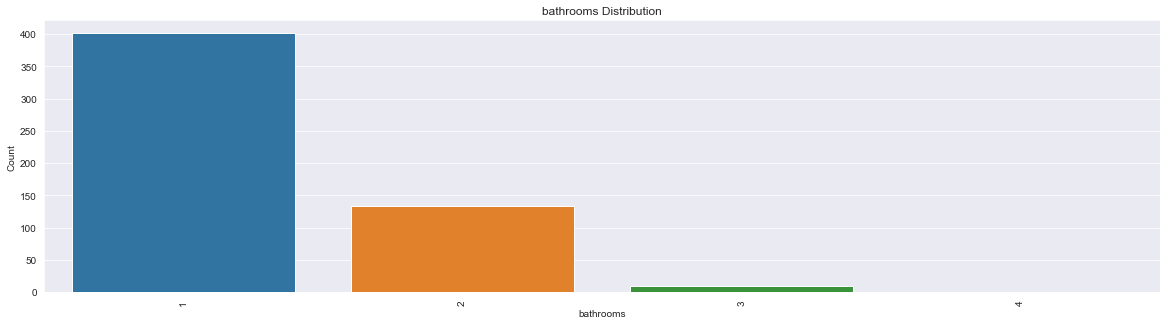

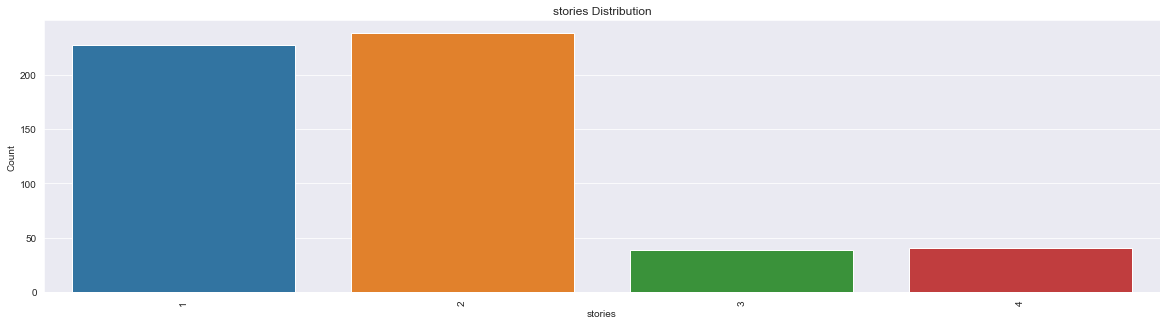

In [18]:
l=['bedrooms','bathrooms','stories']
for i in l:
    plt.figure(figsize=(20,5))
    sns.set_style(style='darkgrid')
    sns.countplot(data=df,x=i)
    plt.title(i + ' Distribution')
    plt.xlabel(i)
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.show()

In [19]:
df.corr()["price"].sort_values(ascending=False).to_frame()

,price
price,1.000000
area,0.535997
bathrooms,0.517545
airconditioning,0.452954
stories,0.420712
parking,0.384394
bedrooms,0.366494
prefarea,0.329777
mainroad,0.296898
guestroom,0.255517


In [20]:
c=['area','bathrooms','airconditioning','stories','parking','bedrooms','prefarea']
for i in c:
    print(df[['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnished','semi_furnished','unfurnished']].corr()[i].sort_values(ascending=False).to_frame(), end="\n\n")

                     area
area             1.000000
parking          0.352980
mainroad         0.288874
prefarea         0.234779
airconditioning  0.222393
bathrooms        0.193820
bedrooms         0.151858
furnished        0.145772
guestroom        0.140297
stories          0.083996
basement         0.047417
semi_furnished   0.006156
hotwaterheating -0.009229
unfurnished     -0.142278

                 bathrooms
bathrooms         1.000000
bedrooms          0.373930
stories           0.326165
area              0.193820
airconditioning   0.186915
parking           0.177496
guestroom         0.126469
furnished         0.108139
basement          0.102106
hotwaterheating   0.067159
prefarea          0.063472
mainroad          0.042398
semi_furnished    0.029834
unfurnished      -0.132107

                 airconditioning
airconditioning         1.000000
stories                 0.293602
area                    0.222393
bathrooms               0.186915
furnished               0.160994
bedro

<AxesSubplot: xlabel='area', ylabel='price'>

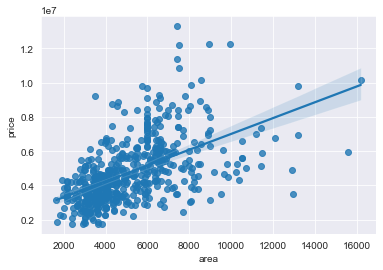

In [21]:
sns.regplot(x='area', y='price', data=df)

In [22]:
x = df.drop('price', axis = 1)
y = df['price']

In [23]:
x.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi_furnished,unfurnished
0,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


In [24]:
y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

### 3. Model Training

#### 3.1 Train Test Split

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [27]:
print(f"""
Shape of X Train: {x_train.shape}
Shape of Y Train: {y_train.shape}
Shape of X Test:  {x_test.shape}
Shape of Y Test:  {y_test.shape}
""")


Shape of X Train: (381, 14)
Shape of Y Train: (381,)
Shape of X Test:  (164, 14)
Shape of Y Test:  (164,)



#### 3.2 Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression
linear_reg= LinearRegression()
linear_reg.fit(x_train, y_train)

LinearRegression()

In [29]:
linear_reg_mod=linear_reg.fit(x_train, y_train)

In [30]:
y_train_pred = linear_reg_mod.predict(x_train)
y_train_pred = pd.DataFrame(y_train_pred)

In [31]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [32]:
R2 = metrics.r2_score(y_train , y_train_pred)
MAE = metrics.mean_absolute_error(y_train , y_train_pred)
MSE = metrics.mean_squared_error(y_train , y_train_pred)
RMSE = np.sqrt(MSE)
pd.DataFrame([R2, MAE, MSE, RMSE], index=['R2 Score', 'MAE', 'MSE', 'RMSE'], columns=['Training Scores'])

,Training Scores
R2 Score,7.034055e-01
MAE,7.669571e+05
MSE,1.063214e+12
RMSE,1.031123e+06


In [33]:
y_pred = linear_reg_mod.predict(x_test)
y_pred = pd.DataFrame(y_pred)

In [34]:
R2 = metrics.r2_score(y_test , y_pred)
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
pd.DataFrame([R2, MAE, MSE, RMSE], index=['R2 Score', 'MAE', 'MSE', 'RMSE'], columns=['Testing Scores'])

,Testing Scores
R2 Score,6.132234e-01
MAE,8.167798e+05
MSE,1.262096e+12
RMSE,1.123431e+06


In [35]:
Prediction = {'Actual Price' : np.array(y_test), 
            'Predicted Price' : np.array(y_pred).flatten()
           }

Prediction = pd.DataFrame(Prediction)
print('Prediction using Linear Regression Model')
Prediction.head(10)

Prediction using Linear Regression Model


,Actual Price,Predicted Price
0,4753000,5.441065e+06
1,8890000,6.237737e+06
2,7455000,4.902441e+06
3,3773000,4.853289e+06
4,3780000,4.695593e+06
5,3703000,3.431977e+06
6,7910000,7.288361e+06
7,3500000,3.243561e+06
8,4098500,4.992553e+06
9,5250000,5.830185e+06


Text(0, 0.5, 'y_pred')

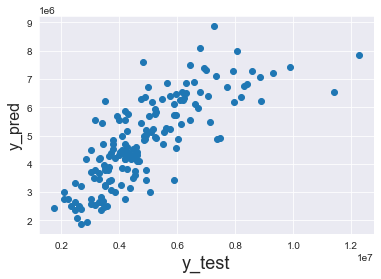

In [36]:
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)  

#### 3.3 Lasso Regression

In [37]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

In [38]:
lasso.fit(x_train, y_train)
y_train_pred = lasso.predict(x_train)
y_train_pred = pd.DataFrame(y_train_pred)

In [39]:
R2 = metrics.r2_score(y_train , y_train_pred)
MAE = metrics.mean_absolute_error(y_train , y_train_pred)
MSE = metrics.mean_squared_error(y_train , y_train_pred)
RMSE = np.sqrt(MSE)
pd.DataFrame([R2, MAE, MSE, RMSE], index=['R2 Score', 'MAE', 'MSE', 'RMSE'], columns=['Training Scores'])

,Training Scores
R2 Score,7.034437e-01
MAE,7.674974e+05
MSE,1.063077e+12
RMSE,1.031056e+06


In [40]:
y_pred = lasso.predict(x_test)
y_pred = pd.DataFrame(y_pred)

In [41]:
R2 = metrics.r2_score(y_test , y_pred)
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
pd.DataFrame([R2, MAE, MSE, RMSE], index=['R2 Score', 'MAE', 'MSE', 'RMSE'], columns=['Testing Scores'])

,Testing Scores
R2 Score,6.125157e-01
MAE,8.177625e+05
MSE,1.264406e+12
RMSE,1.124458e+06


In [42]:
Prediction = {'Actual Price' : np.array(y_test), 
            'Predicted Price' : np.array(y_pred).flatten()
           }

Prediction = pd.DataFrame(Prediction)
print('Prediction using LASSO Regression Model')
Prediction.head()

Prediction using LASSO Regression Model


,Actual Price,Predicted Price
0,4753000,5.436159e+06
1,8890000,6.233443e+06
2,7455000,4.911600e+06
3,3773000,4.861756e+06
4,3780000,4.681151e+06


#### 3.4 Ridge Regression

In [43]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.5)
ridge.fit(x_train, y_train)
y_train_pred = ridge.predict(x_train)
y_train_pred = pd.DataFrame(y_train_pred)

In [44]:
R2 = metrics.r2_score(y_train , y_train_pred)
MAE = metrics.mean_absolute_error(y_train , y_train_pred)
MSE = metrics.mean_squared_error(y_train , y_train_pred)
RMSE = np.sqrt(MSE)
pd.DataFrame([R2, MAE, MSE, RMSE], index=['R2 Score', 'MAE', 'MSE', 'RMSE'], columns=['Training Scores'])

,Training Scores
R2 Score,7.034433e-01
MAE,7.674491e+05
MSE,1.063079e+12
RMSE,1.031057e+06


In [45]:
y_pred = ridge.predict(x_test)
y_pred = pd.DataFrame(y_pred)

In [46]:
R2 = metrics.r2_score(y_test , y_pred).round(5)
MAE = metrics.mean_absolute_error(y_test, y_pred).round(2)
MSE = metrics.mean_squared_error(y_test, y_pred).round(2)
RMSE = np.sqrt(MSE).round(2)
pd.DataFrame([R2, MAE, MSE, RMSE], index=['R2 Score', 'MAE', 'MSE', 'RMSE'], columns=['Testing Scores'])

,Testing Scores
R2 Score,6.126500e-01
MAE,8.174868e+05
MSE,1.263980e+12
RMSE,1.124268e+06


In [47]:
Prediction = {'Actual Price' : np.array(y_test), 
            'Predicted Price' : np.array(y_pred).flatten().round(2)
           }

Prediction = pd.DataFrame(Prediction)
print('Prediction using Ridge Regression Model')
Prediction.head()

Prediction using Ridge Regression Model


,Actual Price,Predicted Price
0,4753000,5435779.48
1,8890000,6234102.57
2,7455000,4910830.01
3,3773000,4862411.90
4,3780000,4680156.29


#### 3.5 ElasticNet Regression

In [48]:
from sklearn.linear_model import ElasticNet
EN = ElasticNet(alpha=1.0, l1_ratio=0.5)
EN.fit(x_train, y_train)
y_train_pred = EN.predict(x_train)
y_train_pred = pd.DataFrame(y_train_pred)

In [49]:
R2 = metrics.r2_score(y_train , y_train_pred)
MAE = metrics.mean_absolute_error(y_train , y_train_pred)
MSE = metrics.mean_squared_error(y_train , y_train_pred)
RMSE = np.sqrt(MSE)
pd.DataFrame([R2, MAE, MSE, RMSE], index=['R2 Score', 'MAE', 'MSE', 'RMSE'], columns=['Training Scores'])

,Training Scores
R2 Score,6.770234e-01
MAE,7.779532e+05
MSE,1.157787e+12
RMSE,1.076005e+06


In [50]:
y_pred = EN.predict(x_test)
y_pred = pd.DataFrame(y_pred)

In [51]:
R2 = metrics.r2_score(y_test , y_pred).round(5)
MAE = metrics.mean_absolute_error(y_test, y_pred).round(2)
MSE = metrics.mean_squared_error(y_test, y_pred).round(2)
RMSE = np.sqrt(MSE).round(2)
pd.DataFrame([R2, MAE, MSE, RMSE], index=['R2 Score', 'MAE', 'MSE', 'RMSE'], columns=['Testing Scores'])

,Testing Scores
R2 Score,6.133200e-01
MAE,7.871769e+05
MSE,1.261790e+12
RMSE,1.123294e+06


In [52]:
Prediction = {'Actual Price' : np.array(y_test), 
            'Predicted Price' : np.array(y_pred).flatten().round(2)
           }

Prediction = pd.DataFrame(Prediction)
print('Prediction using ElasticNet Regression Model')
Prediction.head(10)

Prediction using ElasticNet Regression Model


,Actual Price,Predicted Price
0,4753000,5293042.31
1,8890000,6208419.19
2,7455000,4784511.42
3,3773000,4956305.38
4,3780000,4503912.47
5,3703000,3681162.87
6,7910000,6783972.12
7,3500000,3561016.23
8,4098500,5004110.66
9,5250000,5584245.96


#### 3.6 Polynomial Regression

In [53]:
from sklearn.preprocessing import PolynomialFeatures

In [54]:
pol = PolynomialFeatures (degree = 2)
x_pol = pol.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_pol, y, test_size=0.2, random_state=0)
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)
y_train_pred = Pol_reg.predict(x_train)
y_test_pred = Pol_reg.predict(x_test)

In [55]:
R2 = metrics.r2_score(y_train , y_train_pred)
MAE = metrics.mean_absolute_error(y_train , y_train_pred)
MSE = metrics.mean_squared_error(y_train , y_train_pred)
RMSE = np.sqrt(MSE)
pd.DataFrame([R2, MAE, MSE, RMSE], index=['R2 Score', 'MAE', 'MSE', 'RMSE'], columns=['Training Scores'])

,Training Scores
R2 Score,7.870741e-01
MAE,6.466484e+05
MSE,7.759409e+11
RMSE,8.808751e+05


In [56]:
R2 = metrics.r2_score(y_test , y_test_pred)
MAE = metrics.mean_absolute_error(y_test, y_test_pred)
MSE = metrics.mean_squared_error(y_test, y_test_pred)
RMSE = np.sqrt(MSE)
pd.DataFrame([R2, MAE, MSE, RMSE], index=['R2 Score', 'MAE', 'MSE', 'RMSE'], columns=['Testing Scores'])

,Testing Scores
R2 Score,4.588955e-01
MAE,8.443499e+05
MSE,1.559203e+12
RMSE,1.248680e+06


In [57]:
##Predicting the charges
y_test_pred = Pol_reg.predict(x_test)
##Comparing the actual output values with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df.head()

,Actual,Predicted
239,4585000,4.172315e+06
113,6083000,6.816882e+06
325,4007500,3.742365e+06
66,6930000,1.944324e+06
479,2940000,3.146490e+06


In [58]:
pol = PolynomialFeatures (degree = 1)
x_pol = pol.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_pol, y, test_size=0.2, random_state=0)
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)
y_train_pred = Pol_reg.predict(x_train)
y_test_pred = Pol_reg.predict(x_test)

In [59]:
R2 = metrics.r2_score(y_train , y_train_pred)
MAE = metrics.mean_absolute_error(y_train , y_train_pred)
MSE = metrics.mean_squared_error(y_train , y_train_pred)
RMSE = np.sqrt(MSE)
pd.DataFrame([R2, MAE, MSE, RMSE], index=['R2 Score', 'MAE', 'MSE', 'RMSE'], columns=['Training Scores'])

,Training Scores
R2 Score,6.822530e-01
MAE,7.977060e+05
MSE,1.157928e+12
RMSE,1.076071e+06


In [60]:
R2 = metrics.r2_score(y_test , y_test_pred)
MAE = metrics.mean_absolute_error(y_test, y_test_pred)
MSE = metrics.mean_squared_error(y_test, y_test_pred)
RMSE = np.sqrt(MSE)
pd.DataFrame([R2, MAE, MSE, RMSE], index=['R2 Score', 'MAE', 'MSE', 'RMSE'], columns=['Testing Scores'])

,Testing Scores
R2 Score,6.611214e-01
MAE,7.162311e+05
MSE,9.764848e+11
RMSE,9.881724e+05


#### 3.7 Decsion Tree Regression

In [61]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(x_train, y_train)
y_train_pred = tree_reg.predict(x_train)
y_test_pred = tree_reg.predict(x_test)

In [62]:
R2 = metrics.r2_score(y_train , y_train_pred)
MAE = metrics.mean_absolute_error(y_train , y_train_pred)
MSE = metrics.mean_squared_error(y_train , y_train_pred)
RMSE = np.sqrt(MSE)
pd.DataFrame([R2, MAE, MSE, RMSE], index=['R2 Score', 'MAE', 'MSE', 'RMSE'], columns=['Training Scores'])

,Training Scores
R2 Score,9.987710e-01
MAE,7.706422e+03
MSE,4.478555e+09
RMSE,6.692201e+04


In [63]:
R2 = metrics.r2_score(y_test , y_test_pred)
MAE = metrics.mean_absolute_error(y_test, y_test_pred)
MSE = metrics.mean_squared_error(y_test, y_test_pred)
RMSE = np.sqrt(MSE)
pd.DataFrame([R2, MAE, MSE, RMSE], index=['R2 Score', 'MAE', 'MSE', 'RMSE'], columns=['Testing Scores'])

,Testing Scores
R2 Score,1.777055e-01
MAE,1.093028e+06
MSE,2.369457e+12
RMSE,1.539304e+06


#### 3.8 Random Forrest Regression

In [64]:
from sklearn.ensemble import RandomForestRegressor
RFRmodel = RandomForestRegressor(n_estimators=100,max_depth = 10, min_samples_split=10,random_state=42,criterion='squared_error')
RFRmodel.fit(x_train,y_train)
y_train_pred = RFRmodel.predict(x_train)
y_test_pred = RFRmodel.predict(x_test)

In [65]:
R2 = metrics.r2_score(y_train , y_train_pred)
MAE = metrics.mean_absolute_error(y_train , y_train_pred)
MSE = metrics.mean_squared_error(y_train , y_train_pred)
RMSE = np.sqrt(MSE)
pd.DataFrame([R2, MAE, MSE, RMSE], index=['R2 Score', 'MAE', 'MSE', 'RMSE'], columns=['Training Scores'])

,Training Scores
R2 Score,8.336693e-01
MAE,5.521148e+05
MSE,6.061394e+11
RMSE,7.785495e+05


In [66]:
R2 = metrics.r2_score(y_test , y_test_pred)
MAE = metrics.mean_absolute_error(y_test, y_test_pred)
MSE = metrics.mean_squared_error(y_test, y_test_pred)
RMSE = np.sqrt(MSE)
pd.DataFrame([R2, MAE, MSE, RMSE], index=['R2 Score', 'MAE', 'MSE', 'RMSE'], columns=['Testing Scores'])

,Testing Scores
R2 Score,5.690820e-01
MAE,8.060488e+05
MSE,1.241698e+12
RMSE,1.114315e+06


#### 3.9 kNN Regression

In [67]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)

In [68]:
R2 = metrics.r2_score(y_train , y_train_pred)
MAE = metrics.mean_absolute_error(y_train , y_train_pred)
MSE = metrics.mean_squared_error(y_train , y_train_pred)
RMSE = np.sqrt(MSE)
pd.DataFrame([R2, MAE, MSE, RMSE], index=['R2 Score', 'MAE', 'MSE', 'RMSE'], columns=['Training Scores'])

,Training Scores
R2 Score,5.596466e-01
MAE,9.153773e+05
MSE,1.604728e+12
RMSE,1.266779e+06


In [69]:
R2 = metrics.r2_score(y_test , y_test_pred)
MAE = metrics.mean_absolute_error(y_test, y_test_pred)
MSE = metrics.mean_squared_error(y_test, y_test_pred)
RMSE = np.sqrt(MSE)
pd.DataFrame([R2, MAE, MSE, RMSE], index=['R2 Score', 'MAE', 'MSE', 'RMSE'], columns=['Testing Scores'])

,Testing Scores
R2 Score,3.468219e-01
MAE,9.684833e+05
MSE,1.882145e+12
RMSE,1.371913e+06


### 4. Model Evaluation

From R2 scores, best model is Linear Regression Model.

In [70]:
linear_reg_mod.intercept_

4726312.869868528

In [71]:
linear_reg_mod.coef_

array([5.74613452e+05, 7.32007350e+04, 4.80293454e+05, 4.21306891e+05,
       1.51600919e+05, 3.38662867e+04, 1.89773241e+05, 2.27884307e+05,
       3.94695634e+05, 2.50517450e+05, 2.90043201e+05, 1.49959039e+19,
       1.66204871e+19, 1.59017693e+19])

### 5. Saving Model

In [72]:
from joblib import dump

In [73]:
dump(linear_reg_mod , 'ipa.pkl')

['ipa.pkl']